## Project Overview
This project invovles the modelling of a logistics regression that can precisely predict if an applicant will complete his/her loan application online or not. The project focuses to ensure that the model performs strictly in predicting the applications that would be completed via e-application. 

The dataset used in this project contains records of about 12516 applications. It contains details of information filled during application and if that application was completed via e-application or not. The attributes include:

| Attribute | Description |
|:----------| :-----------:|
| Entry_id | User Identifier - client |
| age | Age of user |
| pay_schedule | How often applicants get paid |
| home_owner | 0:- Rented home 1:- Owner |
| income | Applicant income |
| months_employed | How many months has he been doing the job |
| years_employed | How many years he been doing job |
| current_address_year | How many years a person stayed at the current address |
| personal_account_m | How many months that person had a personal account |
| personal_account_y | How many years has that person had a personal account |
| has_debt | If the individual has debt |
| amount_requested | Loan amount requested |
| risk_score_n (1,2,3,4,5) | Various scores are defined by regulations and internal processes to classify individual risks |
| ext_quality_score_n (1 & 2) | External quality scores defined for each individual |
| inquiries_last_month | Number of times an individual made inquiries in the previous month. |
| Target: e_signed | If the application was completed as an e-signing process or not |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

>Columns such as Entry_id, home_owner, has_debt and e_signed were represented as numerical datatypes, instead of categorical. This specific columns were change in other to allow effective exploratory analysis

In [4]:
#change datatypes
df['Entry_id'] = df['Entry_id'].astype('str')
df['home_owner'] = df['home_owner'].astype('str')
df['has_debt'] = df['has_debt'].astype('str')
df['e_signed'] = df['e_signed'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  object 
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  object 
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  object 
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [5]:
#check duplicates
df[df.Entry_id.duplicated(keep=False)].sort_values(by=["Entry_id"])

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
2488,3903643,41,bi-weekly,0,3035,0,5,0,2,6,...,700,56550,0.574753,0.843991,0.241663,0.516921,0.715925,0.715925,15,1
9804,3903643,38,bi-weekly,1,2620,0,2,0,6,4,...,400,67050,0.740419,0.939486,0.684477,0.778170,0.629805,0.729805,9,1
7213,5659209,42,bi-weekly,1,2140,0,2,9,6,4,...,400,56700,0.781691,0.920329,0.481009,0.594963,0.736846,0.536846,6,1
7288,5659209,46,bi-weekly,1,7092,0,3,1,2,3,...,700,64350,0.679462,0.757643,0.550134,0.391500,0.487792,0.587792,6,1
5361,5896278,31,weekly,0,1635,0,6,5,2,2,...,400,73200,0.797840,0.849569,0.687969,0.741433,0.696454,0.696454,6,0
11829,5896278,30,bi-weekly,0,3795,0,2,3,1,3,...,800,50650,0.760728,0.850893,0.573459,0.606560,0.564857,0.564857,4,1
4419,5946902,43,semi-monthly,1,4725,3,6,6,5,8,...,1000,59250,0.724398,0.944054,0.444145,0.582691,0.698231,0.698231,3,1
12124,5946902,41,semi-monthly,1,4295,2,2,1,3,2,...,1200,54100,0.681107,0.860848,0.525299,0.689527,0.421167,0.621167,9,0
2626,7450902,57,bi-weekly,0,5295,0,6,4,2,6,...,1700,91500,0.648824,0.789179,0.640210,0.653759,0.694329,0.594329,5,0
9209,7450902,35,bi-weekly,0,4095,6,2,0,1,3,...,700,57850,0.780735,0.929274,0.625784,0.792078,0.550449,0.550449,5,0


>About 6 Entry_id were seen to be duplicated, on investigating, no key insights were discovered to explain their occurence. These duplicated entries were then dropped from the dataset.

In [6]:
# Select all duplicated Entry_id rows (both first and subsequent duplicates)
duplicated_rows = df[df['Entry_id'].duplicated(keep=False)]

# Drop these duplicated rows from the original DataFrame
df = df.drop(duplicated_rows.index)

> Let's check the occurence of each E Signed status

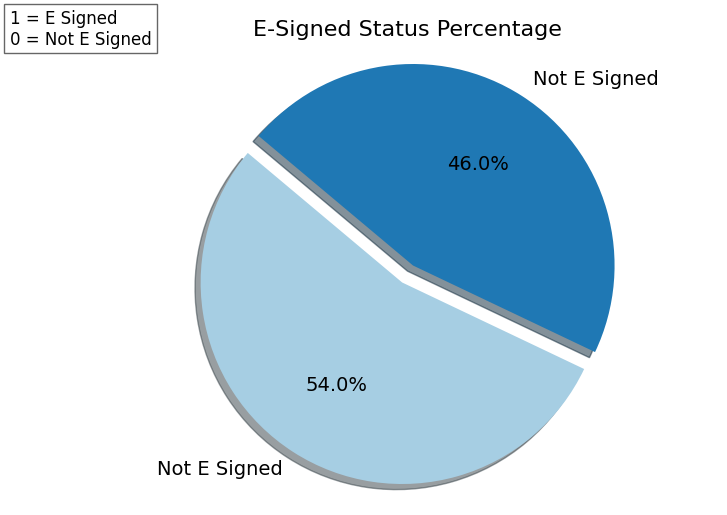

In [7]:
# Calculate percentages
percentages = df['e_signed'].value_counts(normalize=True) * 100
labels = ['E Signed' if x == 1 else 'Not E Signed' for x in percentages.index]

# Explode biggest slice
explode = [0.1 if val == max(percentages) else 0 for val in percentages]

# Plot
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140,
        explode=explode, shadow=True, colors=plt.cm.Paired.colors, textprops={'fontsize': 14})

plt.title('E-Signed Status Percentage', fontsize=16)
plt.axis('equal')

# Add explanatory text in the plot area
plt.text(-2.0, 1.1, "1 = E Signed\n0 = Not E Signed", fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.6))

plt.show()

> The dataset showed almost similar representation of both process of application, whether e-signed or not e-signed

In [8]:
df.describe(include='all')

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,12504,12504.000000,12504,12504,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,...,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504.000000,12504
unique,12504,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,1498559,NaN,bi-weekly,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,1,NaN,7438,7189,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6758
mean,NaN,43.028951,NaN,NaN,3654.022473,1.191619,3.533269,3.593730,3.402351,3.507997,...,950.435701,61133.017434,0.690646,0.877967,0.582870,0.718526,0.621966,0.621926,6.494162,NaN
std,NaN,11.869298,NaN,NaN,1508.140632,2.405020,2.265652,2.748869,2.207010,1.960116,...,707.137159,15400.454978,0.090311,0.054191,0.125262,0.121091,0.139898,0.139666,3.732407,NaN
min,NaN,18.000000,NaN,NaN,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,NaN
25%,NaN,34.000000,NaN,NaN,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,600.000000,49450.000000,0.641204,0.850893,0.499887,0.635034,0.519794,0.519608,4.000000,NaN
50%,NaN,42.000000,NaN,NaN,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,...,700.000000,61200.000000,0.699605,0.880993,0.588202,0.725743,0.624081,0.623808,6.000000,NaN
75%,NaN,51.000000,NaN,NaN,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,...,1100.000000,72750.000000,0.752033,0.911477,0.672448,0.806604,0.729787,0.728494,8.000000,NaN


>From the quick statistical analysis, the dataset was seen to have extreme values as its maximum value, but must of which are easily justifiable, except from amount_requested. To investigate further, we decided to check if completing application via e-signing could be attributed to either low or high amount of loan requested.

In [9]:
e_signed_df = df[df["e_signed"] == '1']
not_e_signed_df = df[df["e_signed"] == "0"]

In [10]:
e_signed_df.describe(include='all')

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,6758,6758.000000,6758,6758,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,...,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758
unique,6758,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,1498559,NaN,bi-weekly,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,1,NaN,3964,4055,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6758
mean,NaN,42.101213,NaN,NaN,3708.556082,1.190737,3.553862,3.550755,3.220775,3.461231,...,992.992897,62309.322285,0.691488,0.876540,0.583750,0.717931,0.618173,0.619209,6.384729,NaN
std,NaN,11.630750,NaN,NaN,1570.570956,2.450732,2.308522,2.753503,2.117413,2.008615,...,694.899651,15278.606694,0.089175,0.055829,0.124778,0.122064,0.143344,0.140930,3.604006,NaN
min,NaN,18.000000,NaN,NaN,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,350.000000,2800.000000,0.023258,0.529718,0.088819,0.153367,0.012841,0.006622,1.000000,NaN
25%,NaN,33.000000,NaN,NaN,2560.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,600.000000,50650.000000,0.642953,0.849684,0.501208,0.634322,0.515669,0.518185,4.000000,NaN
50%,NaN,42.000000,NaN,NaN,3280.000000,0.000000,3.000000,3.000000,2.000000,3.000000,...,700.000000,62700.000000,0.700408,0.879916,0.587781,0.726226,0.620044,0.622777,6.000000,NaN
75%,NaN,50.000000,NaN,NaN,4755.000000,1.000000,5.000000,5.000000,5.000000,4.000000,...,1100.000000,73750.000000,0.752254,0.911485,0.672674,0.807229,0.730003,0.726711,8.000000,NaN


In [11]:
not_e_signed_df.describe(include='all')

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,5746,5746.000000,5746,5746,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,...,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5746
unique,5746,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,9857590,NaN,bi-weekly,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,1,NaN,3474,3134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5746
mean,NaN,44.120084,NaN,NaN,3589.884267,1.192656,3.509050,3.644274,3.615907,3.563000,...,900.383223,59749.538810,0.689657,0.879647,0.581834,0.719226,0.626427,0.625121,6.622868,NaN
std,NaN,12.053833,NaN,NaN,1428.708814,2.350332,2.214126,2.742785,2.289770,1.900194,...,718.104186,15429.515877,0.091628,0.052154,0.125833,0.119943,0.135609,0.138109,3.874348,NaN
min,NaN,18.000000,NaN,NaN,1015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,350.000000,2100.000000,0.049926,0.451371,0.016724,0.160915,0.010184,0.140713,1.000000,NaN
25%,NaN,35.000000,NaN,NaN,2595.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,600.000000,47950.000000,0.639164,0.852992,0.497789,0.635706,0.525219,0.521785,4.000000,NaN
50%,NaN,44.000000,NaN,NaN,3230.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,700.000000,59650.000000,0.697764,0.881083,0.588724,0.725109,0.628564,0.624864,6.000000,NaN
75%,NaN,53.000000,NaN,NaN,4560.000000,1.000000,5.000000,5.000000,6.000000,4.000000,...,1000.000000,71700.000000,0.751892,0.911474,0.672161,0.805758,0.729241,0.730820,8.000000,NaN


> On investigating, Two dataframe were created for e-signed and not e-signed application. Checking their statistical data, e-signed dataframe was seen to have a maximum loan amount of 4200 requested while not e-signed applications was seen to have a maximun value of 10200 loan amount requested. So therefore, it can be deduced that the extreme amount of loan requested are attributed to not e-signed application. To further understand the relation with loan amount requested, let's check their distribution.

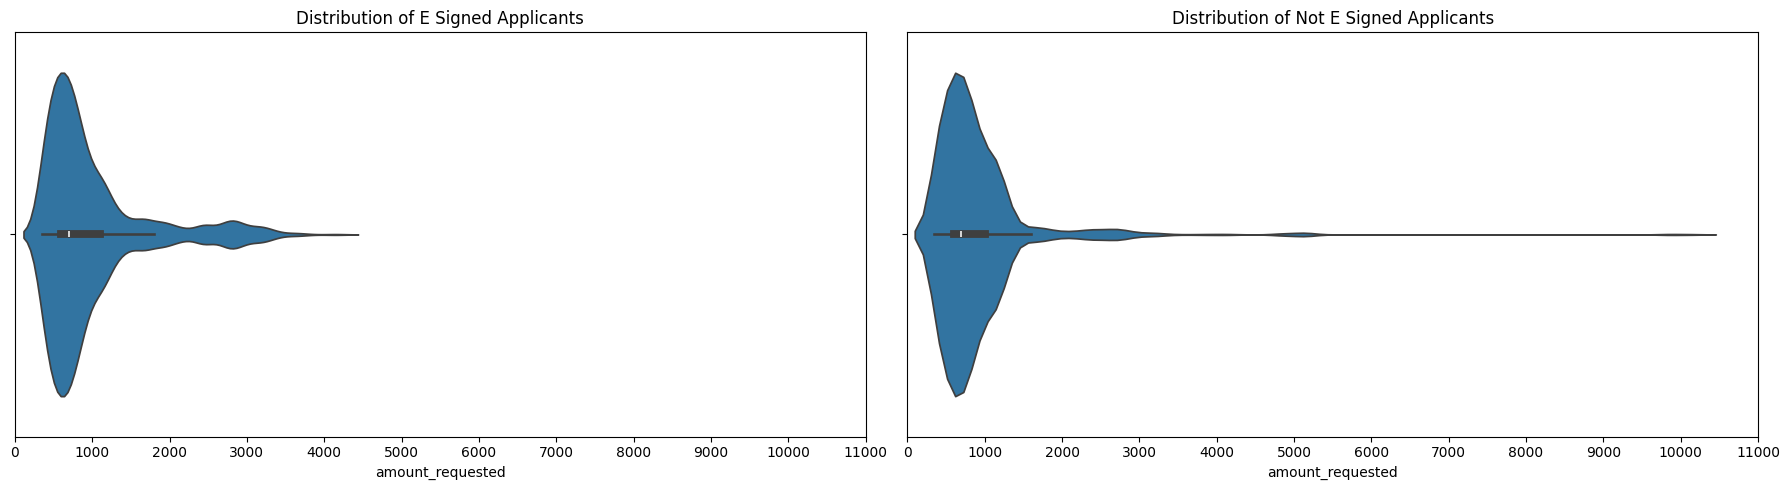

In [12]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.violinplot(data=e_signed_df, x='amount_requested', ax=axes[0])
axes[0].set_title(f'Distribution of E Signed Applicants')

sns.violinplot(data=not_e_signed_df, x='amount_requested', ax=axes[1])
axes[1].set_title(f'Distribution of Not E Signed Applicants')

# Find combined min and max for the x axis from both datasets
min_val = min(e_signed_df['amount_requested'].min(), not_e_signed_df['amount_requested'].min())
max_val = max(e_signed_df['amount_requested'].max(), not_e_signed_df['amount_requested'].max())

# Set same x limits
axes[0].set_xlim(min_val, max_val)
axes[1].set_xlim(min_val, max_val)

# Optionally set identical x-ticks (you can customize intervals)
ticks = plt.MaxNLocator(nbins=10).tick_values(min_val, max_val)
axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

plt.tight_layout()
plt.show()

> From the chart, although not e-signed applications had high loan amount requested, the majority of both dataframe falls between 0 - 1000 loan amount requested. For further investigation, let display the dataframe for those extreme loan amount, setting 5200 as threshold

In [13]:
df[df['amount_requested'] > 5200]

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
694,5630469,44,weekly,0,4185,0,5,3,3,8,...,9800,81450,0.646139,0.901217,0.756098,0.928600,0.778479,0.878479,3,0
925,4022618,44,semi-monthly,1,9010,0,6,10,2,7,...,7800,65100,0.430296,0.871038,0.600762,0.838858,0.631608,0.431608,7,0
1110,2711645,45,weekly,0,4985,0,6,3,6,4,...,10100,77800,0.802045,0.924773,0.724051,0.877127,0.634045,0.834045,6,0
5463,8186336,38,weekly,1,8055,0,6,0,6,3,...,9800,93050,0.735571,0.929285,0.645887,0.845785,0.842970,0.742970,5,0
6915,4277035,55,weekly,1,9190,0,6,6,4,7,...,10100,67500,0.641031,0.822814,0.713797,0.681161,0.686840,0.486840,6,0
7029,2727440,48,weekly,0,6050,0,1,2,2,8,...,9900,86050,0.681682,0.845192,0.711775,0.882229,0.682137,0.682137,7,0
7258,3584944,40,weekly,1,3170,0,3,9,6,3,...,9900,62550,0.566944,0.875426,0.483409,0.746294,0.638993,0.738993,5,0
7648,4815606,40,bi-weekly,0,5015,0,5,5,3,8,...,8300,72250,0.675618,0.882295,0.617922,0.830199,0.652217,0.552217,5,0
7741,9058043,30,semi-monthly,0,2725,0,2,4,6,4,...,10200,64650,0.682788,0.897861,0.539384,0.710599,0.825154,0.625154,4,0
8065,9573164,38,bi-weekly,0,7155,0,6,2,6,3,...,9900,74250,0.631845,0.927141,0.607946,0.875591,0.556791,0.756791,6,0


> The table shows no similarity among other columns for these entries that falls above the threshold except that they are not e_signed. Let's check if similarities exist between each column for e-signed and not e-signed dataframe

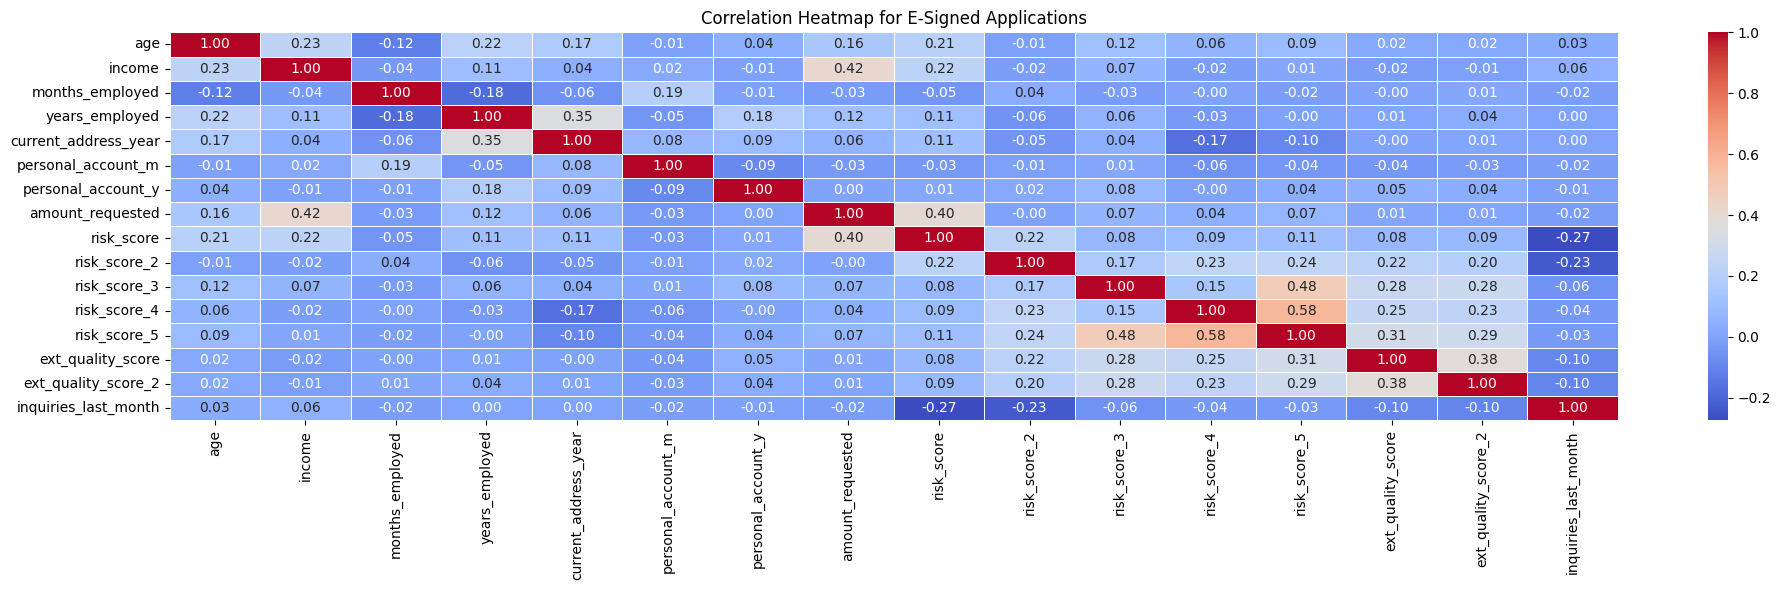

In [14]:
corr_matrix = e_signed_df.corr(numeric_only=True)

plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for E-Signed Applications")
plt.tight_layout()
plt.show()

For e-signed applications, the heatmap shows a little correlation strength between the following column pair:
1. income and amount_requested
2. amount_requested and risk_score
3. risk_score 5 with both risk_score 3 and 4

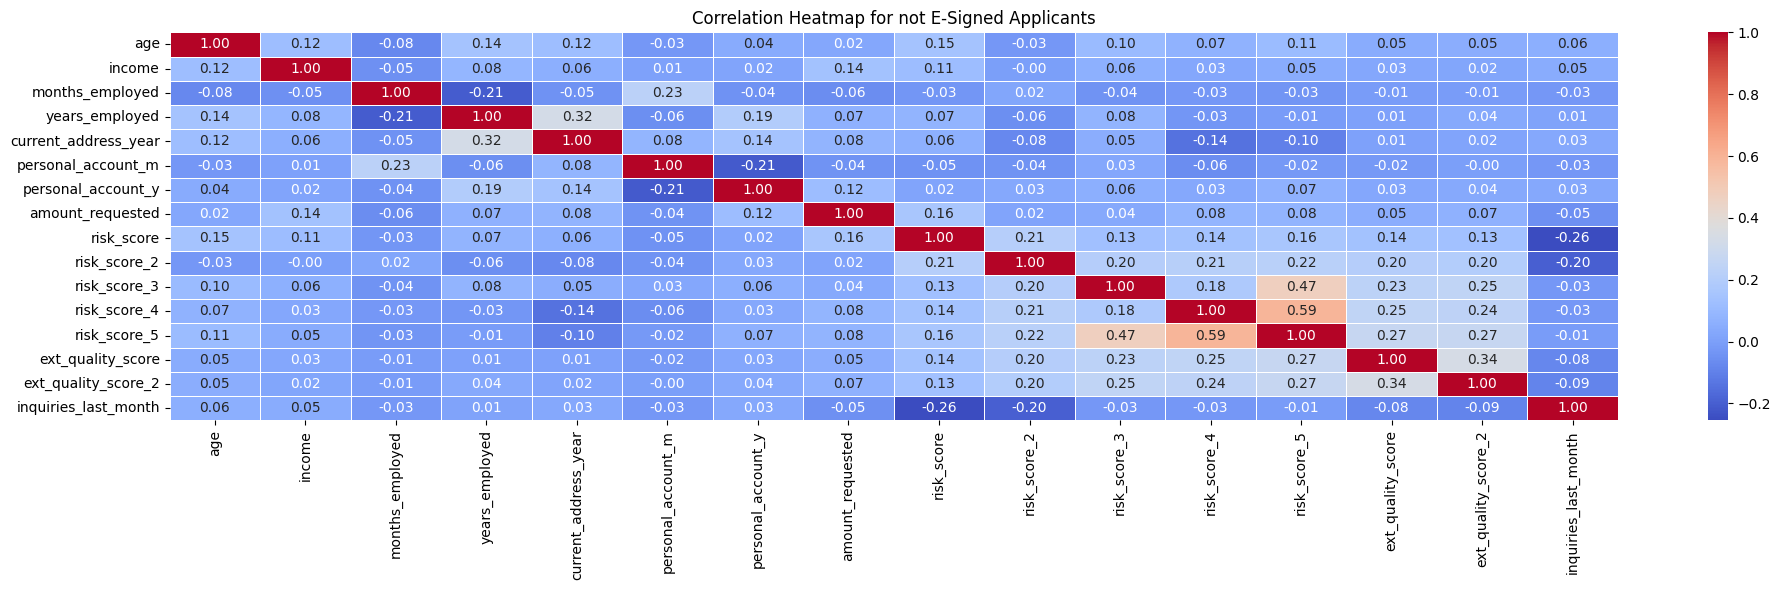

In [15]:
corr_matrix = not_e_signed_df.corr(numeric_only=True)

plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for not E-Signed Applicants")
plt.tight_layout()
plt.show()

While for not e-signed applications, the heatmap shows a little correlation strength between only risk_score 5 with both risk_score 3 and 4

Summary

In summary, it was notice that there were very little linear relationship between the attributes in this dataset. 

### Model Development

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import joblib
import warnings

warnings.filterwarnings("ignore")

To properly perform the model training home owner, has debt and e signed columns were converted back to numerical datatype. 

In [17]:
df['home_owner'] = df['home_owner'].astype('int64')
df['has_debt'] = df['has_debt'].astype('int64')
df['e_signed'] = df['e_signed'].astype('int64')

The dataset was initially divided into two subsets: a development set (80%) and a test set (20%). The development set was used for building and tuning the model, while the test set was reserved for final evaluation to assess real-world performance.

In [18]:
X = df.drop(["Entry_id", 'e_signed'], axis=1)
y = df["e_signed"]

# Split dataset into dev_df and test_df (80% train, 20% test)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Model Development set: ', X_dev.shape[0])
print('Test set: ', X_test.shape[0])

Model Development set:  10003
Test set:  2501


Within the development set, we further split the data into a training set and a validation set. This split was done with a specific objective in mind: we needed the model to be highly precise in predicting e-signed applications, minimizing false positives. In other words, when the model predicts that an application will be completed via e-signing, it should be correct most of the time.

To achieve this, we deliberately introduced a class imbalance in the training set, ensuring it contained more non-e-signed cases. This approach encourages the model to learn stricter criteria for predicting e-signed completions, making it more conservative and precise in its positive classifications.

In [54]:
dev_df = pd.concat([X_dev, y_dev], axis=1)
target_col = 'e_signed'
desired_class = 0  # the class you want more of in the training set

# Split the DataFrame by class
df_desired = dev_df[dev_df[target_col] == desired_class]
df_other = dev_df[dev_df[target_col] != desired_class]

# Split desired class: more in train, less in test (e.g., 90% train, 10% test)
df_desired_train, df_desired_val = train_test_split(df_desired, test_size=0.1, random_state=42)

# Split other classes normally (e.g., 70% train, 30% test)
df_other_train, df_other_val = train_test_split(df_other, test_size=0.5, random_state=42)

# Combine splits
train_df = pd.concat([df_desired_train, df_other_train]).sample(frac=1, random_state=42)  # shuffle
val_df = pd.concat([df_desired_val, df_other_val]).sample(frac=1, random_state=42)     # shuffle

# Check representation
print("Train label distribution:\n", train_df[target_col].value_counts(normalize=True))
print("Validation label distribution:\n", val_df[target_col].value_counts(normalize=True))

Train label distribution:
 e_signed
0    0.604825
1    0.395175
Name: proportion, dtype: float64
Validation label distribution:
 e_signed
1    0.854568
0    0.145432
Name: proportion, dtype: float64


In [55]:
X_train = train_df.drop(['e_signed'], axis=1)
y_train = train_df["e_signed"]

X_val = val_df.drop(['e_signed'], axis=1)
y_val = val_df["e_signed"]

In [56]:
print('Train set: ', X_train.shape[0])
print('Validation set: ', X_val.shape[0])
print('Test set: ', X_test.shape[0])

Train set:  6840
Validation set:  3163
Test set:  2501


#### 🔧 Feature Engineering Summary

To enhance the model’s performance, several feature engineering steps were applied to transform the raw data into meaningful inputs for training:
1. One-hot encoding was performed on the pay_schedule column to convert the categorical values into a binary format suitable for modelling.
2. All date-related features were transformed into the number of months to ensure uniformity and scalability across time-based variables.
3. A log transformation was applied to the risk_score column to reduce skewness due to large values and stabilise variance.
4. For other risk score metrics, the average was computed to create a consolidated risk score feature.
5. Similarly, the average value was calculated for the external_quality_score column to capture overall applicant quality.
6. Finally, the income and amount_requested columns were normalised using Min-Max scaling to bring their values within a consistent range and avoid bias due to differing scales.


In [57]:
# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# Fit on training categorical columns
X_train_cat = encoder.fit_transform(X_train[['pay_schedule']])
# Get column names for encoded features
encoded_columns = encoder.get_feature_names_out(['pay_schedule'])
# Convert to DataFrame
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_columns, index=X_train.index)

X_train["month_current_address"] = X_train['current_address_year'] * 12
X_train["total_month_employed"] = X_train["months_employed"] + (12 * X_train["years_employed"])
X_train["total_month_personal_account"] = X_train["personal_account_m"] + (12 * X_train["personal_account_y"])
X_train['risk_score_log'] = np.log(X_train['risk_score'])
X_train['average_risk_score'] = X_train[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].mean(axis=1)
X_train['average_ext_quality_score'] = X_train[['ext_quality_score', 'ext_quality_score']].mean(axis=1)

# Scaling features
to_be_scaled = ["income", 'amount_requested']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train[to_be_scaled])
X_train_scaled_df = pd.DataFrame(X_scaled, columns=X_train[to_be_scaled].columns, index=X_train.index)


main = ['age', 'home_owner', 'has_debt', 'risk_score_log', 'average_risk_score', 'average_ext_quality_score', 'month_current_address', 'total_month_employed', 'total_month_personal_account', 'inquiries_last_month']

X_train_encoded = pd.concat([X_train[main], X_train_cat_df, X_train_scaled_df], axis=1)
X_train_encoded

,age,home_owner,has_debt,risk_score_log,average_risk_score,average_ext_quality_score,month_current_address,total_month_employed,total_month_personal_account,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,income,amount_requested
9842,57,1,1,11.127998,0.760272,0.856720,60,15,98,6,0.0,1.0,0.0,0.579702,0.045685
42,35,0,1,11.179548,0.748669,0.517257,84,24,30,8,0.0,0.0,1.0,0.480419,0.035533
8289,86,1,0,11.280993,0.662749,0.585647,108,72,38,3,1.0,0.0,0.0,0.571429,0.055838
2863,32,0,1,11.099680,0.835422,0.593505,0,24,88,8,0.0,1.0,0.0,0.137341,0.086294
6166,48,1,1,11.251561,0.782727,0.643265,48,74,87,4,0.0,0.0,1.0,0.314396,0.086294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,38,1,1,11.198899,0.713606,0.788971,48,48,62,5,0.0,0.0,0.0,0.467733,0.218274
7253,28,1,1,10.901358,0.601691,0.515931,12,12,55,3,0.0,1.0,0.0,0.150579,0.025381
3360,44,0,1,10.582789,0.589328,0.608603,0,36,38,6,0.0,0.0,0.0,0.207391,0.025381
11561,44,0,1,11.031659,0.658523,0.558238,72,17,28,4,0.0,0.0,0.0,0.477661,0.086294


In [58]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [59]:
def features_engineer(eva_df):
  eva_df_cat = encoder.transform(eva_df[['pay_schedule']])
  # Convert to DataFrame
  eva_df_cat_df = pd.DataFrame(eva_df_cat, columns=encoded_columns, index=eva_df.index)

  eva_df["month_current_address"] = eva_df['current_address_year'] * 12
  eva_df["total_month_employed"] = eva_df["months_employed"] + (12 * eva_df["years_employed"])
  eva_df["total_month_personal_account"] = eva_df["personal_account_m"] + (12 * eva_df["personal_account_y"])
  eva_df['risk_score_log'] = np.log(eva_df['risk_score'])
  eva_df['average_risk_score'] = eva_df[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].mean(axis=1)
  eva_df['average_ext_quality_score'] = eva_df[['ext_quality_score', 'ext_quality_score']].mean(axis=1)


  # Standardize features
  eva_df_scaled = scaler.transform(eva_df[to_be_scaled])
  eva_df_scaled_df = pd.DataFrame(eva_df_scaled, columns=eva_df[to_be_scaled].columns, index=eva_df.index)

  eva_df_encoded = pd.concat([eva_df[main], eva_df_cat_df, eva_df_scaled_df], axis=1)

  return eva_df_encoded

In [60]:
#validation evaluation
X_val_encoded = features_engineer(X_val)
#predict outcome
y_val_pred = model.predict(X_val_encoded)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.15      0.97      0.26       460
           1       0.94      0.09      0.16      2703

    accuracy                           0.22      3163
   macro avg       0.55      0.53      0.21      3163
weighted avg       0.82      0.22      0.18      3163



In [61]:
#Test Evaluation
X_test_encoded = features_engineer(X_test)
#predict outcome
y_test_pred = model.predict(X_test_encoded)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.47      0.94      0.62      1149
           1       0.63      0.08      0.15      1352

    accuracy                           0.48      2501
   macro avg       0.55      0.51      0.38      2501
weighted avg       0.55      0.48      0.37      2501



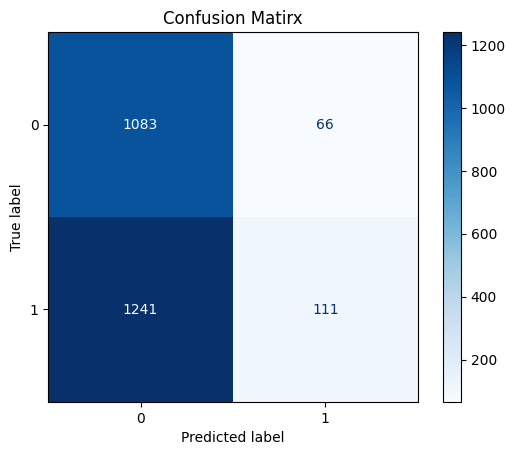

In [62]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matirx")
plt.show()

AUC_Score: 0.55


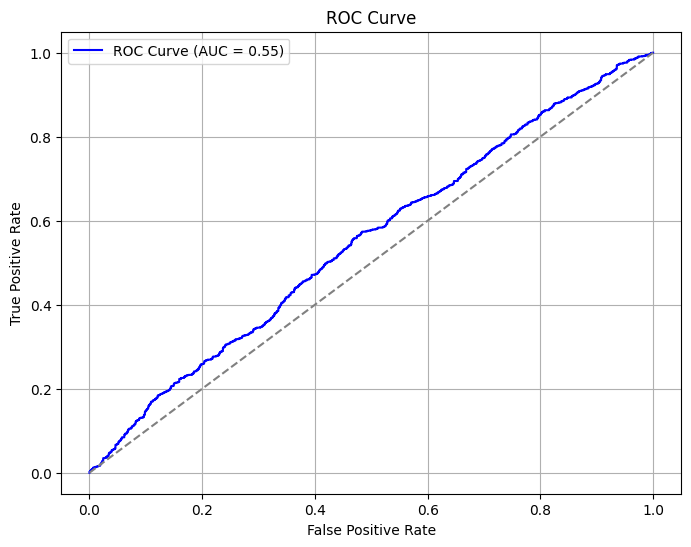

In [63]:
y_prob = model.predict_proba(X_test_encoded)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC_Score: {auc_score:.2f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Model Evaluation
The predictive model achieved a precision score of 78%, meaning that for every 100 applications predicted to be completed via e-signing, 78 were indeed completed through the online e-sign process.

#### Interpretation
##### Strength:
The model demonstrates high accuracy in its positive predictions, which helps reduce the risk of misallocating resources to applications mistakenly expected to be completed online. This precision ensures that efforts are focused on genuinely high-probability e-sign applications.

##### Weakness:
The model may miss a significant portion of actual e-signed applications, implying that it has a relatively lower recall. As a result, some users who would eventually complete their applications online might not be identified early enough for targeted intervention.

In [64]:
joblib.dump(model, 'loan_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Model Deployment

In [65]:
import pandas as pd
import numpy as np
import joblib

In [66]:
data = {
  'age': 30, 
  'pay_schedule': 'bi-weekly', 
  'home_owner': '1',
  'income': 4000.0, 
  'months_employed': 4, 
  'years_employed': 6, 
  'current_address_year': 5, 
  'personal_account_m': 4, 
  'personal_account_y': 3, 
  'has_debt': '1', 
  'amount_requested': 1200.0, 
  'risk_score': 4000.0, 
  'risk_score_2': 0.67, 
  'risk_score_3': 0.73, 
  'risk_score_4': 0.76, 
  'risk_score_5': 0.69, 
  'ext_quality_score': 0.68, 
  'ext_quality_score_2': 0.68, 
  'inquiries_last_month': 5}

In [67]:
df = pd.DataFrame(data, index=[0])
df

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,30,bi-weekly,1,4000.0,4,6,5,4,3,1,1200.0,4000.0,0.67,0.73,0.76,0.69,0.68,0.68,5


In [68]:
model = joblib.load('loan_model.pkl')
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')

def features_engineer(eva_df):
  to_be_scaled = ["income", 'amount_requested']
  main = ['age', 'home_owner', 'has_debt', 'risk_score_log', 'average_risk_score', 'average_ext_quality_score', 'month_current_address', 'total_month_employed', 'total_month_personal_account', 'inquiries_last_month']
  eva_df_cat = encoder.transform(eva_df[['pay_schedule']])
  # Get column names for encoded features
  encoded_columns = encoder.get_feature_names_out(['pay_schedule'])
  eva_df_cat_df = pd.DataFrame(eva_df_cat, columns=encoded_columns, index=eva_df.index)

  eva_df["month_current_address"] = eva_df['current_address_year'] * 12
  eva_df["total_month_employed"] = eva_df["months_employed"] + (12 * eva_df["years_employed"])
  eva_df["total_month_personal_account"] = eva_df["personal_account_m"] + (12 * eva_df["personal_account_y"])
  eva_df['risk_score_log'] = np.log(eva_df['risk_score'])
  eva_df['average_risk_score'] = eva_df[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].mean(axis=1)
  eva_df['average_ext_quality_score'] = eva_df[['ext_quality_score', 'ext_quality_score']].mean(axis=1)


  # Standardize features
  eva_df_scaled = scaler.transform(eva_df[to_be_scaled])
  eva_df_scaled_df = pd.DataFrame(eva_df_scaled, columns=eva_df[to_be_scaled].columns, index=eva_df.index)

  eva_df_encoded = pd.concat([eva_df[main], eva_df_cat_df, eva_df_scaled_df], axis=1)

  return eva_df_encoded

In [69]:
input_df = features_engineer(df)

In [70]:
pred = model.predict(input_df)[0]
print(f'E Signed: {pred}')

probability = model.predict_proba(input_df)[0][pred]
print(f'Certainity: {probability*100: .2f}%')

E Signed: 0
Certainity:  59.67%


### Model Comparison

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
import joblib
import warnings
import time

warnings.filterwarnings("ignore")

In [16]:
df['home_owner'] = df['home_owner'].astype('int64')
df['has_debt'] = df['has_debt'].astype('int64')
df['e_signed'] = df['e_signed'].astype('int64')

In [17]:
X = df.drop(["Entry_id", 'e_signed'], axis=1)
y = df["e_signed"]

# Split dataset into dev_df and test_df (80% train, 20% test)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Model Development set: ', X_dev.shape[0])
print('Test set: ', X_test.shape[0])


# Split dataset into dev_df and test_df (90% train, 10% test)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=0.1, random_state=42)

Model Development set:  10003
Test set:  2501


In [18]:
print('Train set: ', X_train.shape[0])
print('Validation set: ', X_val.shape[0])
print('Test set: ', X_test.shape[0])

Train set:  9002
Validation set:  1001
Test set:  2501


In [19]:
# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# Fit on training categorical columns
X_train_cat = encoder.fit_transform(X_train[['pay_schedule']])
# Get column names for encoded features
encoded_columns = encoder.get_feature_names_out(['pay_schedule'])
# Convert to DataFrame
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_columns, index=X_train.index)

X_train["month_current_address"] = X_train['current_address_year'] * 12
X_train["total_month_employed"] = X_train["months_employed"] + (12 * X_train["years_employed"])
X_train["total_month_personal_account"] = X_train["personal_account_m"] + (12 * X_train["personal_account_y"])
X_train['risk_score_log'] = np.log(X_train['risk_score'])
X_train['average_risk_score'] = X_train[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].mean(axis=1)
X_train['average_ext_quality_score'] = X_train[['ext_quality_score', 'ext_quality_score']].mean(axis=1)

# Scaling features
to_be_scaled = ["income", 'amount_requested']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train[to_be_scaled])
X_train_scaled_df = pd.DataFrame(X_scaled, columns=X_train[to_be_scaled].columns, index=X_train.index)


main = ['age', 'home_owner', 'has_debt', 'risk_score_log', 'average_risk_score', 'average_ext_quality_score', 'month_current_address', 'total_month_employed', 'total_month_personal_account', 'inquiries_last_month']

X_train_encoded = pd.concat([X_train[main], X_train_cat_df, X_train_scaled_df], axis=1)
X_train_encoded

,age,home_owner,has_debt,risk_score_log,average_risk_score,average_ext_quality_score,month_current_address,total_month_employed,total_month_personal_account,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,income,amount_requested
6475,34,0,1,10.384369,0.706250,0.750573,0,24,50,14,0.0,0.0,0.0,0.087148,0.005076
10344,60,0,1,11.025165,0.699652,0.838253,60,84,54,8,0.0,0.0,0.0,0.645891,0.045685
5111,31,0,1,11.310809,0.859513,0.627109,12,22,26,2,0.0,0.0,0.0,0.076227,0.025381
5445,45,1,1,11.039717,0.670169,0.411558,60,6,26,3,0.0,0.0,0.0,0.456150,0.025381
4848,57,0,1,11.112448,0.822323,0.514185,24,48,29,4,0.0,0.0,1.0,0.623828,0.126904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,52,0,1,11.149801,0.709596,0.688183,12,60,42,6,0.0,0.0,0.0,0.259790,0.076142
7140,35,0,1,10.868568,0.700948,0.680586,12,72,54,8,0.0,0.0,1.0,0.476558,0.005076
10122,46,0,0,11.309585,0.722813,0.913201,72,72,50,7,0.0,1.0,0.0,0.295091,0.035533
4534,33,1,1,10.934891,0.618439,0.601895,108,24,28,6,0.0,0.0,0.0,0.070050,0.025381


In [20]:
def features_engineer(eva_df):
  eva_df_cat = encoder.transform(eva_df[['pay_schedule']])
  # Convert to DataFrame
  eva_df_cat_df = pd.DataFrame(eva_df_cat, columns=encoded_columns, index=eva_df.index)

  eva_df["month_current_address"] = eva_df['current_address_year'] * 12
  eva_df["total_month_employed"] = eva_df["months_employed"] + (12 * eva_df["years_employed"])
  eva_df["total_month_personal_account"] = eva_df["personal_account_m"] + (12 * eva_df["personal_account_y"])
  eva_df['risk_score_log'] = np.log(eva_df['risk_score'])
  eva_df['average_risk_score'] = eva_df[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].mean(axis=1)
  eva_df['average_ext_quality_score'] = eva_df[['ext_quality_score', 'ext_quality_score']].mean(axis=1)


  # Standardize features
  eva_df_scaled = scaler.transform(eva_df[to_be_scaled])
  eva_df_scaled_df = pd.DataFrame(eva_df_scaled, columns=eva_df[to_be_scaled].columns, index=eva_df.index)

  eva_df_encoded = pd.concat([eva_df[main], eva_df_cat_df, eva_df_scaled_df], axis=1)

  return eva_df_encoded

In [21]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [44]:
#validation evaluation
X_val_encoded = features_engineer(X_val)
#predict outcome
y_val_pred = model.predict(X_val_encoded)
print("Validation Evaluation")
print(classification_report(y_val, y_val_pred))

#Test Evaluation
X_test_encoded = features_engineer(X_test)
#predict outcome
start = time.time()
y_test_pred = model.predict(X_test_encoded)
pred_time = time.time() - start
print(pred_time)
print("Test Evaluation")
print(classification_report(y_test, y_test_pred))

Validation Evaluation
              precision    recall  f1-score   support

           0       0.56      0.35      0.43       460
           1       0.58      0.77      0.66       541

    accuracy                           0.58      1001
   macro avg       0.57      0.56      0.55      1001
weighted avg       0.57      0.58      0.56      1001

0.004007577896118164
Test Evaluation
              precision    recall  f1-score   support

           0       0.51      0.31      0.39      1149
           1       0.56      0.75      0.64      1352

    accuracy                           0.55      2501
   macro avg       0.54      0.53      0.52      2501
weighted avg       0.54      0.55      0.53      2501



In [23]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [45]:
#validation evaluation
X_val_encoded = features_engineer(X_val)
#predict outcome
y_val_pred = model_dt.predict(X_val_encoded)
print("Validation Evaluation")
print(classification_report(y_val, y_val_pred))

#Test Evaluation
start=time.time()
X_test_encoded = features_engineer(X_test)
pred_time = time.time() - start
print(pred_time)
#predict outcome
y_test_pred = model_dt.predict(X_test_encoded)
print("Test Evaluation")
print(classification_report(y_test, y_test_pred))

Validation Evaluation
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       460
           1       0.60      0.57      0.58       541

    accuracy                           0.56      1001
   macro avg       0.56      0.56      0.56      1001
weighted avg       0.56      0.56      0.56      1001

0.03939962387084961
Test Evaluation
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1149
           1       0.58      0.59      0.58      1352

    accuracy                           0.55      2501
   macro avg       0.54      0.54      0.54      2501
weighted avg       0.54      0.55      0.55      2501



In [25]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [46]:
#validation evaluation
X_val_encoded = features_engineer(X_val)
#predict outcome
y_val_pred = model_rf.predict(X_val_encoded)
print("Validation Evaluation")
print(classification_report(y_val, y_val_pred))

#Test Evaluation
X_test_encoded = features_engineer(X_test)
#predict outcome
start = time.time()
y_test_pred = model_rf.predict(X_test_encoded)
pred_time = time.time() - start
print(pred_time)
print("Test Evaluation")
print(classification_report(y_test, y_test_pred))

Validation Evaluation
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       460
           1       0.66      0.66      0.66       541

    accuracy                           0.63      1001
   macro avg       0.63      0.63      0.63      1001
weighted avg       0.63      0.63      0.63      1001

0.14109349250793457
Test Evaluation
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1149
           1       0.62      0.65      0.64      1352

    accuracy                           0.60      2501
   macro avg       0.60      0.59      0.60      2501
weighted avg       0.60      0.60      0.60      2501



In [46]:
model_tune = RandomForestClassifier(random_state=42)

param_dist = {
  'n_estimators': [10, 100, 1000],
  'max_depth': [10],
  'min_samples_split': [9, 12, 15, 18],
  'min_samples_leaf': [3, 4, 5, 6, 7],
  'max_features': ['auto', 'sqrt', 'log2'],
}

search = GridSearchCV(
  estimator=model_tune,
  param_grid=param_dist,
  cv=5,
  scoring='accuracy',
  verbose=2,
  n_jobs=-1,
)
search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [9, 12, 15, 18],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=2)

In [47]:
print(search.best_estimator_)
print(search.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=9)
0.6256396446418655


In [ ]:
RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=3) = 0.6244177925843667
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=9) = 0.6254171756431612
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=6,
                       min_samples_split=12)  = 0.6273049540378802

In [29]:
model_fine = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=6,
                       min_samples_split=12, random_state=42)
model_fine.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=6,
                       min_samples_split=12, random_state=42)

In [47]:
#validation evaluation
X_val_encoded = features_engineer(X_val)
#predict outcome
y_val_pred = model_fine.predict(X_val_encoded)
print("Validation Evaluation")
print(classification_report(y_val, y_val_pred))

#Test Evaluation
X_test_encoded = features_engineer(X_test)
#predict outcome
start =  time.time()
y_test_pred = model_fine.predict(X_test_encoded)
pred_time = time.time() - start
print(pred_time)
print("Test Evaluation")
print(classification_report(y_test, y_test_pred))

Validation Evaluation
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       460
           1       0.65      0.73      0.69       541

    accuracy                           0.64      1001
   macro avg       0.64      0.64      0.64      1001
weighted avg       0.64      0.64      0.64      1001

0.08195710182189941
Test Evaluation
              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1149
           1       0.61      0.70      0.65      1352

    accuracy                           0.60      2501
   macro avg       0.59      0.59      0.59      2501
weighted avg       0.59      0.60      0.59      2501



In [37]:
weights = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'LR_Weight': abs(model.coef_[0]), 
    'DT_Importance': model_dt.feature_importances_,
    'RF_Importance': model_rf.feature_importances_,
    'FT_Importance': model_fine.feature_importances_
})

weights

,Feature,LR_Weight,DT_Importance,RF_Importance,FT_Importance
0,age,0.018420,0.088257,0.095026,0.100051
1,home_owner,0.226627,0.009066,0.011245,0.023910
2,has_debt,0.128796,0.009746,0.012924,0.010894
3,risk_score_log,0.124123,0.135018,0.119051,0.127059
4,average_risk_score,0.123803,0.114225,0.105378,0.069556
5,average_ext_quality_score,0.333301,0.118639,0.108147,0.079092
6,month_current_address,0.000117,0.054706,0.058543,0.035646
7,total_month_employed,0.001710,0.053648,0.073419,0.050236
8,total_month_personal_account,0.003247,0.094897,0.101245,0.137947
9,inquiries_last_month,0.016674,0.059124,0.065858,0.049218


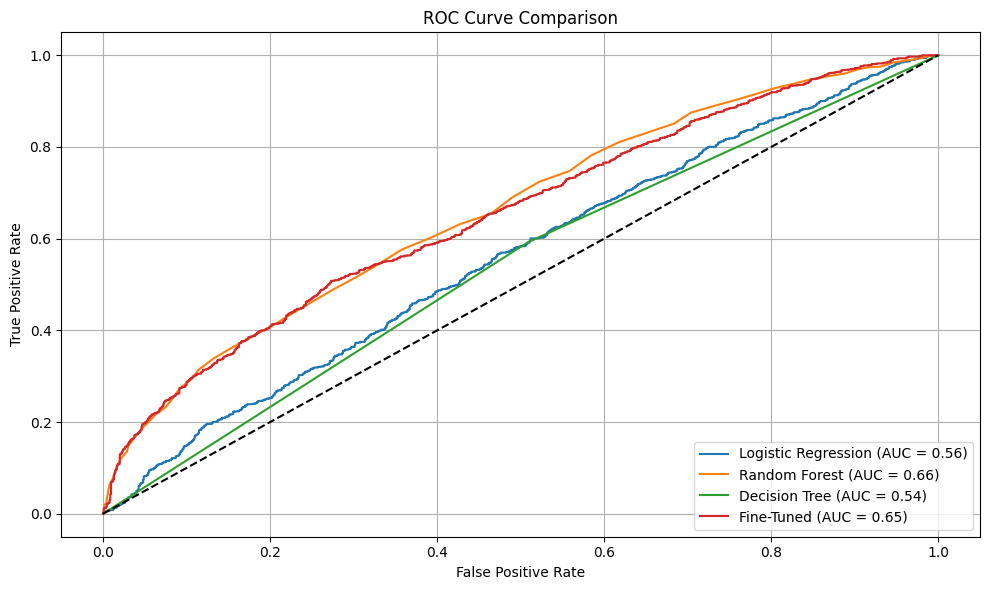

In [42]:
# Get predicted probabilities
y_prob_logreg = model.predict_proba(X_test_encoded)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test_encoded)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test_encoded)[:, 1]
y_prob_fine = model_fine.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curves and AUC scores
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_fine, tpr_fine, _ = roc_curve(y_test, y_prob_fine)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_dt = auc(fpr_dt, tpr_dt)
auc_fine = auc(fpr_fine, tpr_fine)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_fine, tpr_fine, label=f'Fine-Tuned (AUC = {auc_fine:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
